# Notebook Imports and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from math import log

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sympy import symbols, diff

%matplotlib inline

## Example 1

$f(x) = x^2 + x + 1$

In [52]:
def f(x):
    return x**2 + x + 1

In [53]:
#make data
x_1 = np.linspace(start=-3, stop=3, num=500)

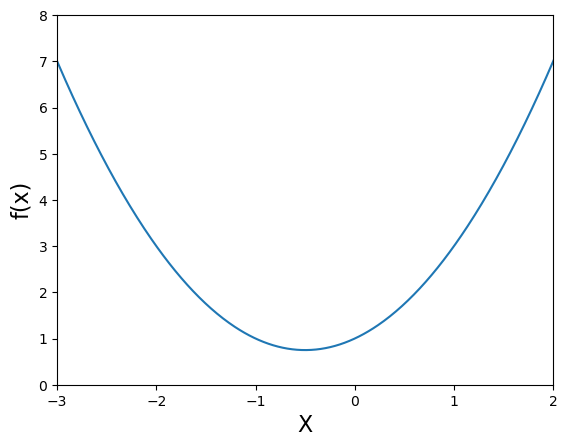

In [54]:
#plot
plt.xlim([-3,2])
plt.ylim([0,8])
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))

## Slope & Derivatives
Challenge : Create àpython function for the dervative of $f(x)$ called $df(x)$

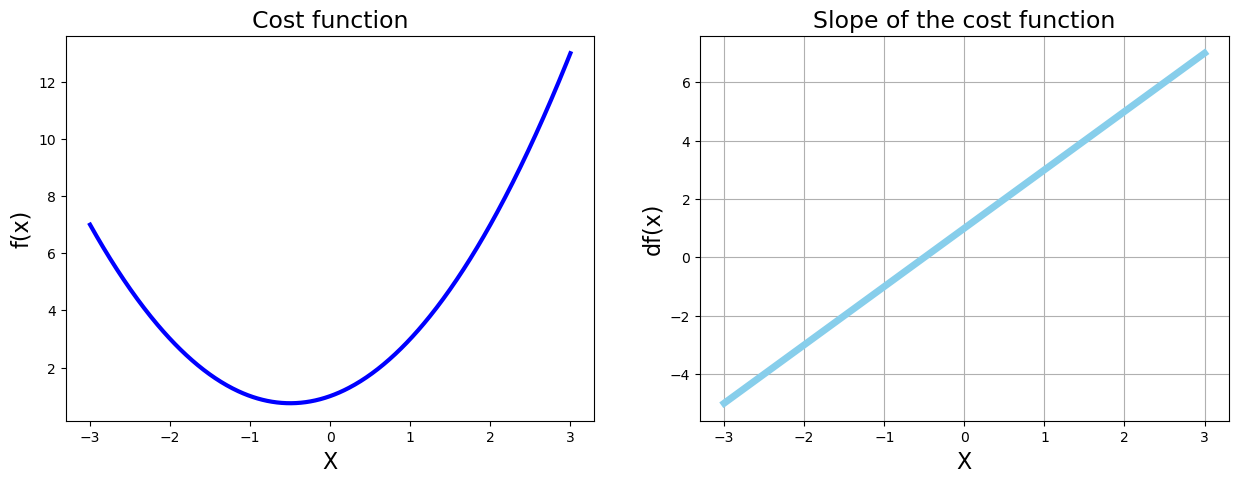

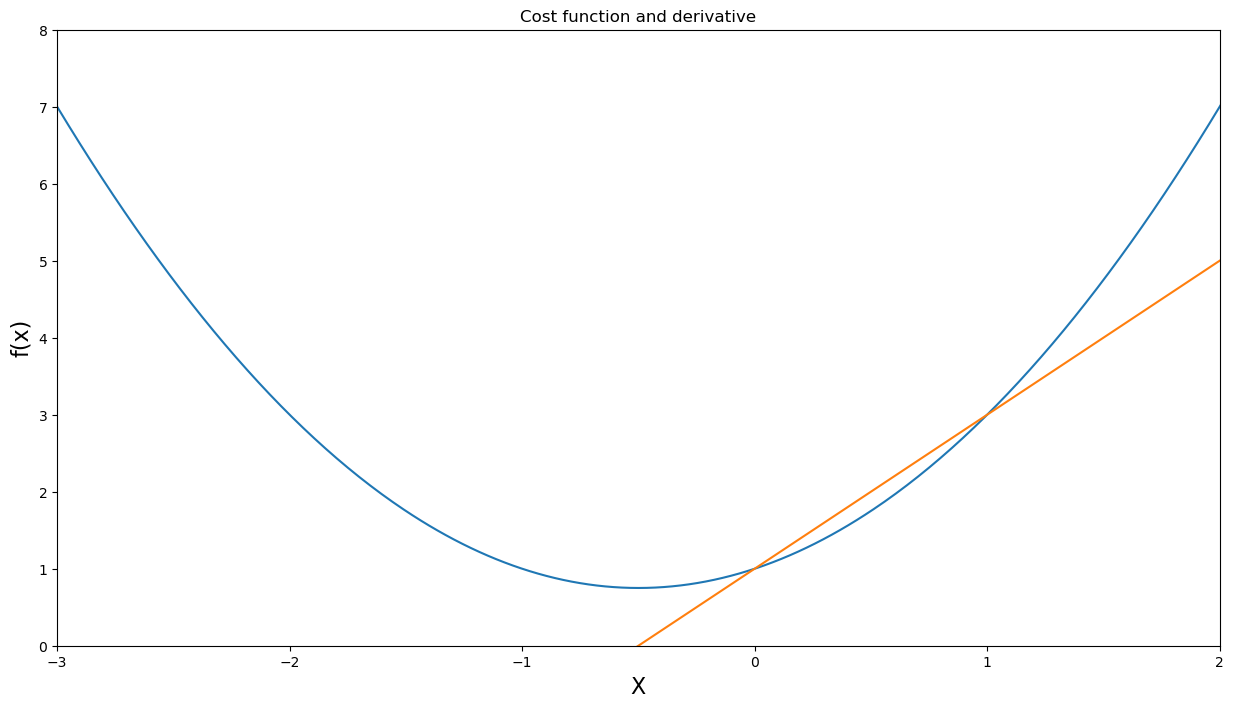

In [55]:
# Plot function and derivative side by side

def df(x):
    return 2*x+1

#plot

plt.figure(figsize=[15,5])

# First chart : Cost function
plt.subplot(1,2,1)
plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 Chart : Derivative
plt.subplot(1,2,2)
plt.title('Slope of the cost function', fontsize=17)
plt.grid()
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)


# 3 Chart : Union of both
plt.figure(figsize=[15,8])
plt.title('Cost function and derivative')
plt.xlim([-3,2])
plt.ylim([0,8])
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.plot(x_1, df(x_1))

plt.show()

## Gradient Descent

In [56]:
new_x = -3
previous_x = 0
step_multiplier = 0.1

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x) # La dérivée permet de savoir la pente, plus elle est grande, plus la marge d'erreur est importante
    new_x = previous_x - step_multiplier * gradient
    
    step_size = abs(new_x - previous_x)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
print('Local minmum occurs at:', new_x)
print('Slope or d(f) value at this point is: ', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

Local minmum occurs at: -0.5000000000000002
Slope or d(f) value at this point is:  -4.440892098500626e-16
f(x) value or cost at this point is: 0.75


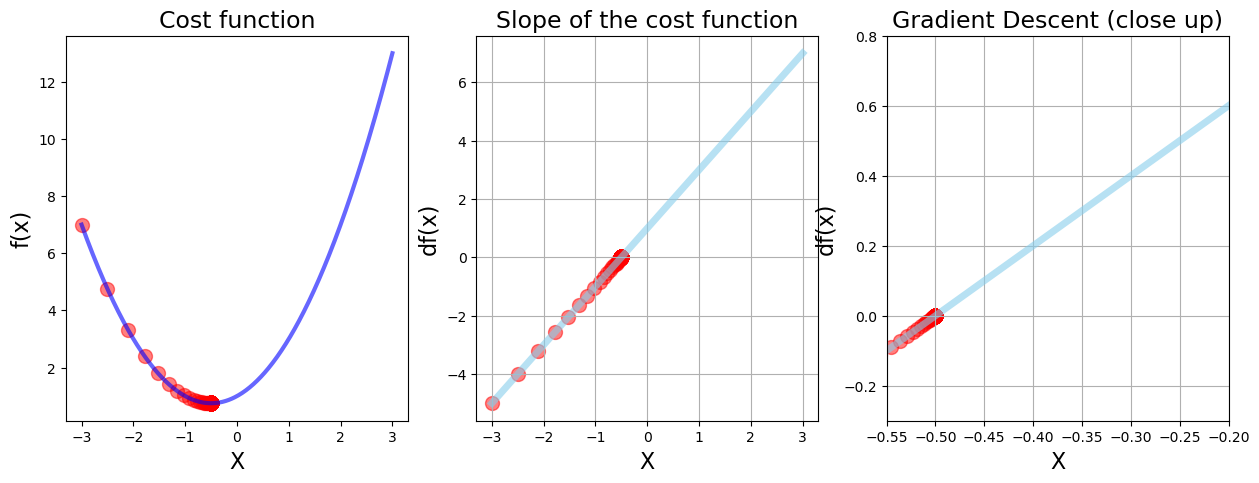

In [57]:
# Superimpose the gradient descent calculation


values = np.array(x_list)
plt.figure(figsize=[15,5])

# First chart : Cost function
plt.subplot(1,3,1)
plt.scatter(x_list, f(values), color='red', s=100, alpha=.5)
plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=.6)

# 2 Chart : Derivative
plt.subplot(1,3,2)
plt.title('Slope of the cost function', fontsize=17)
plt.grid()
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=.5)

# 3 Chart : Close up
plt.subplot(1,3,3)
plt.title('Gradient Descent (close up)', fontsize=17)
plt.grid()
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=.5)

plt.show()

## Example 2 - Multiple minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [68]:
# Make some data
x_2 = np.linspace(-2, 2, 1000)

# Challenge : write the g(x) and the dg(x) functions in Python?

def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

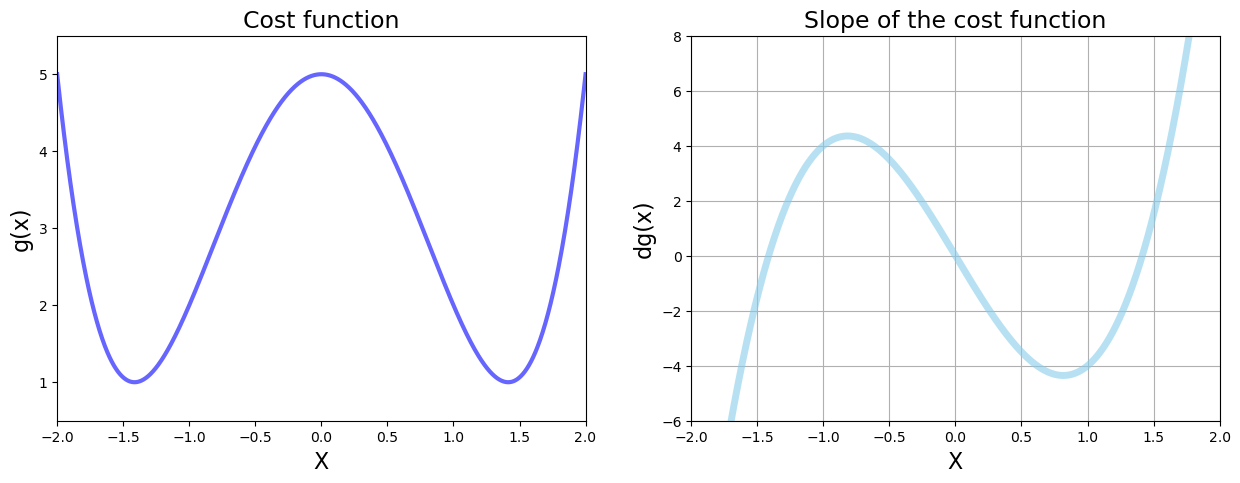

In [69]:
# Superimpose the gradient descent calculation


values = np.array(x_list)
plt.figure(figsize=[15,5])

# First chart : Cost function
plt.subplot(1,2,1)
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=.6)

# 2 Chart : Derivative
plt.subplot(1,2,2)
plt.title('Slope of the cost function', fontsize=17)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=.6)
plt.show()

### Gradient Descent as a Python Function

In [70]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001,
                     max_iter=300):
    new_x = initial_guess

    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x) # La dérivée permet de savoir la pente, plus elle est grande, plus la marge d'erreur est importante
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        
        if step_size < precision:
            break
            
    return new_x, x_list, slope_list

In [71]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0.5,
                                                 multiplier=0.02, precision=0.001)
print('Local min occurs at:', local_min)
print('Number of steps', len(list_x))

Local min occurs at: 1.4122375085019094
Number of steps 23


In [72]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.5,
                                                 multiplier=0.02, precision=0.001)
print('Local min occurs at:', local_min)
print('Number of steps', len(list_x))

Local min occurs at: -1.4122375085019094
Number of steps 23


In [73]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.1)
print('Local min occurs at:', local_min)
print('Number of steps', len(list_x))

Local min occurs at: -1.4120887490901561
Number of steps 34


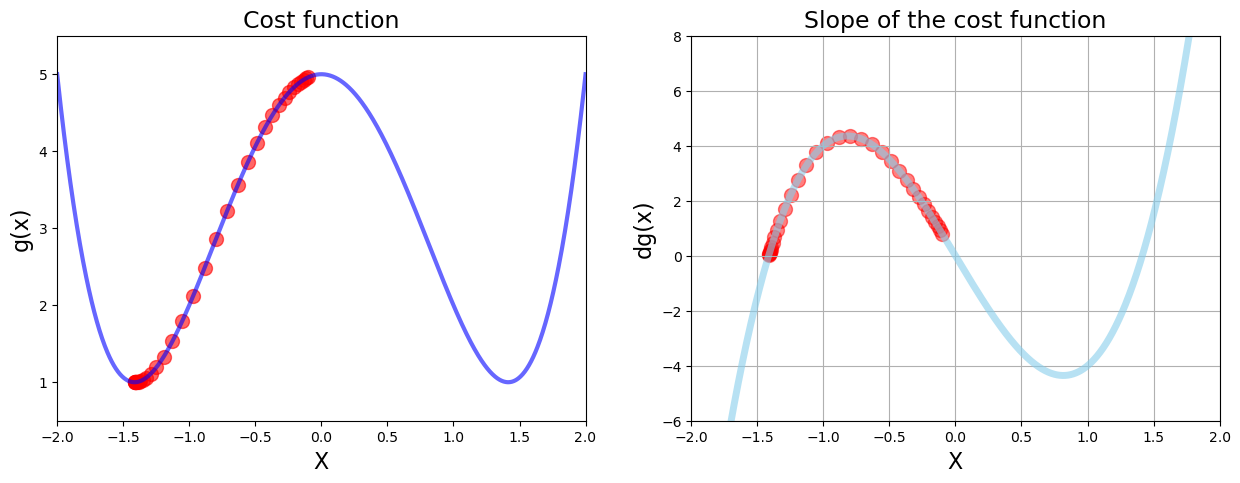

In [74]:
# Superimpose the batch gradient descent calculation

values = np.array(x_list)
plt.figure(figsize=[15,5])

# First chart : Cost function
plt.subplot(1,2,1)
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=.6)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=.6)

# 2 Chart : Derivative
plt.subplot(1,2,2)
plt.title('Slope of the cost function', fontsize=17)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=.5)

plt.show()

# Example 3 - Divergence, Overflow and Python tuples
$$h(x) = x^5 -2x^4 + 2$$

In [75]:
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

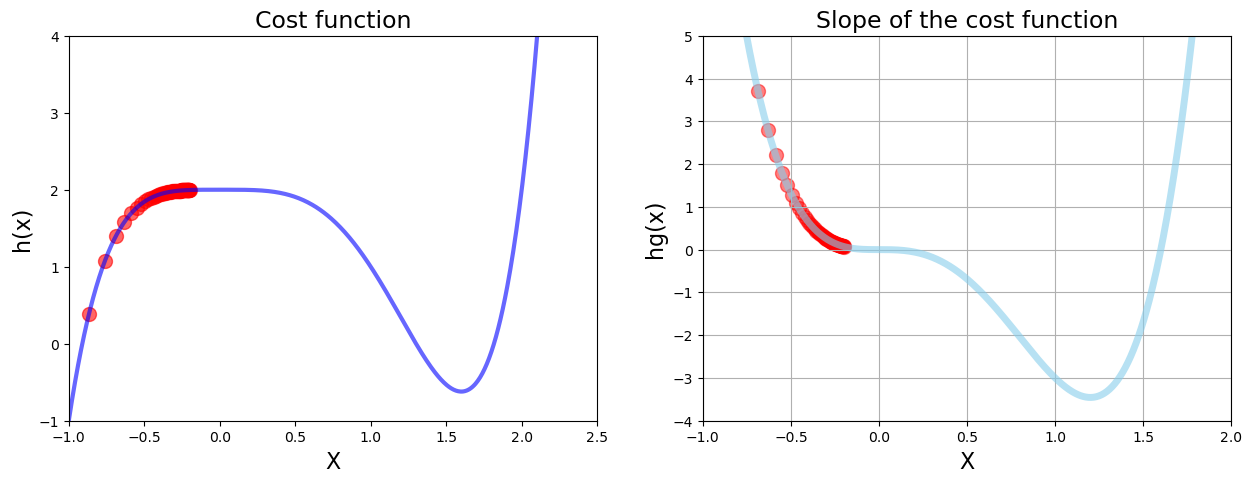

Local min occurs at:  -2071072.4470816324
Cost at this minimum is:  -3.810455326061589e+31
Number of steps is:  71


In [66]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess=-0.2, max_iter=70)

# Superimpose the batch gradient descent calculation

values = np.array(x_list)
plt.figure(figsize=[15,5])

# First chart : Cost function
plt.subplot(1,2,1)
plt.xlim(-1, 2.5)
plt.ylim(-1, 4)
plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)
plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=.6)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=.6)

# 2 Chart : Derivative
plt.subplot(1,2,2)
plt.title('Slope of the cost function', fontsize=17)
plt.grid()
plt.xlim(-1, 2)
plt.ylim(-4, 5)
plt.xlabel('X', fontsize=16)
plt.ylabel('hg(x)', fontsize=16)
plt.plot(x_3, dh(x_3), color='skyblue', linewidth=5, alpha=.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=.5)

plt.show()

print('Local min occurs at: ', local_min)
print('Cost at this minimum is: ', h(local_min))
print('Number of steps is: ', len(list_x))

In [76]:
# import sys
# help()
# sys.version
# sys.float_info.max

## Python Tuples

In [77]:
# Creating a tuple
breakfast = 'bacon', 'eggs', 'avocado'
unlucky_numbers = 13, 4, 9, 26, 17

print('I looooove', breakfast[0])
print('My hotel has no ' + str(unlucky_numbers[1]) + 'th floor')

not_my_address = 1, 'Infinite loop', 'Cupertino', 95014
tuple_with_single_value = 'my first value', # Tuple with a single value

print(tuple_with_single_value)
print(type(tuple_with_single_value))

main, side, greens = breakfast # Sequence unpacking

print('Main:', main, '- Side:', side, '- Greens:', greens)

I looooove bacon
My hotel has no 4th floor
('my first value',)
<class 'tuple'>
Main: bacon - Side: eggs - Greens: avocado


# The Learning rate

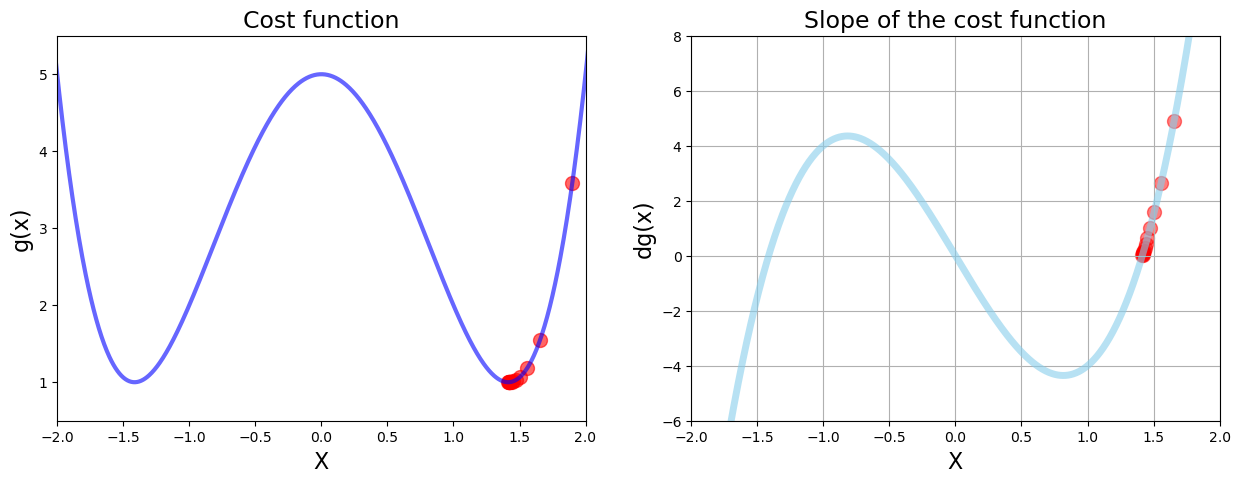

Local min occurs at:  1.415879815113846
Cost at this minimum is:  -0.34751175621515884
Number of steps is:  14


In [78]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.02, max_iter=500)

# Superimpose the batch gradient descent calculation

values = np.array(x_list)
plt.figure(figsize=[15,5])

# First chart : Cost function
plt.subplot(1,2,1)
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_3, g(x_3), color='blue', linewidth=3, alpha=.6)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=.6)

# 2 Chart : Derivative
plt.subplot(1,2,2)
plt.title('Slope of the cost function', fontsize=17)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.plot(x_3, dg(x_3), color='skyblue', linewidth=5, alpha=.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=.5)

plt.show()

print('Local min occurs at: ', local_min)
print('Cost at this minimum is: ', h(local_min))
print('Number of steps is: ', len(list_x))

# 500 tours de boucle et pas de convergence, il faut faire gaffe à l'algo sinon il tournera éternellement


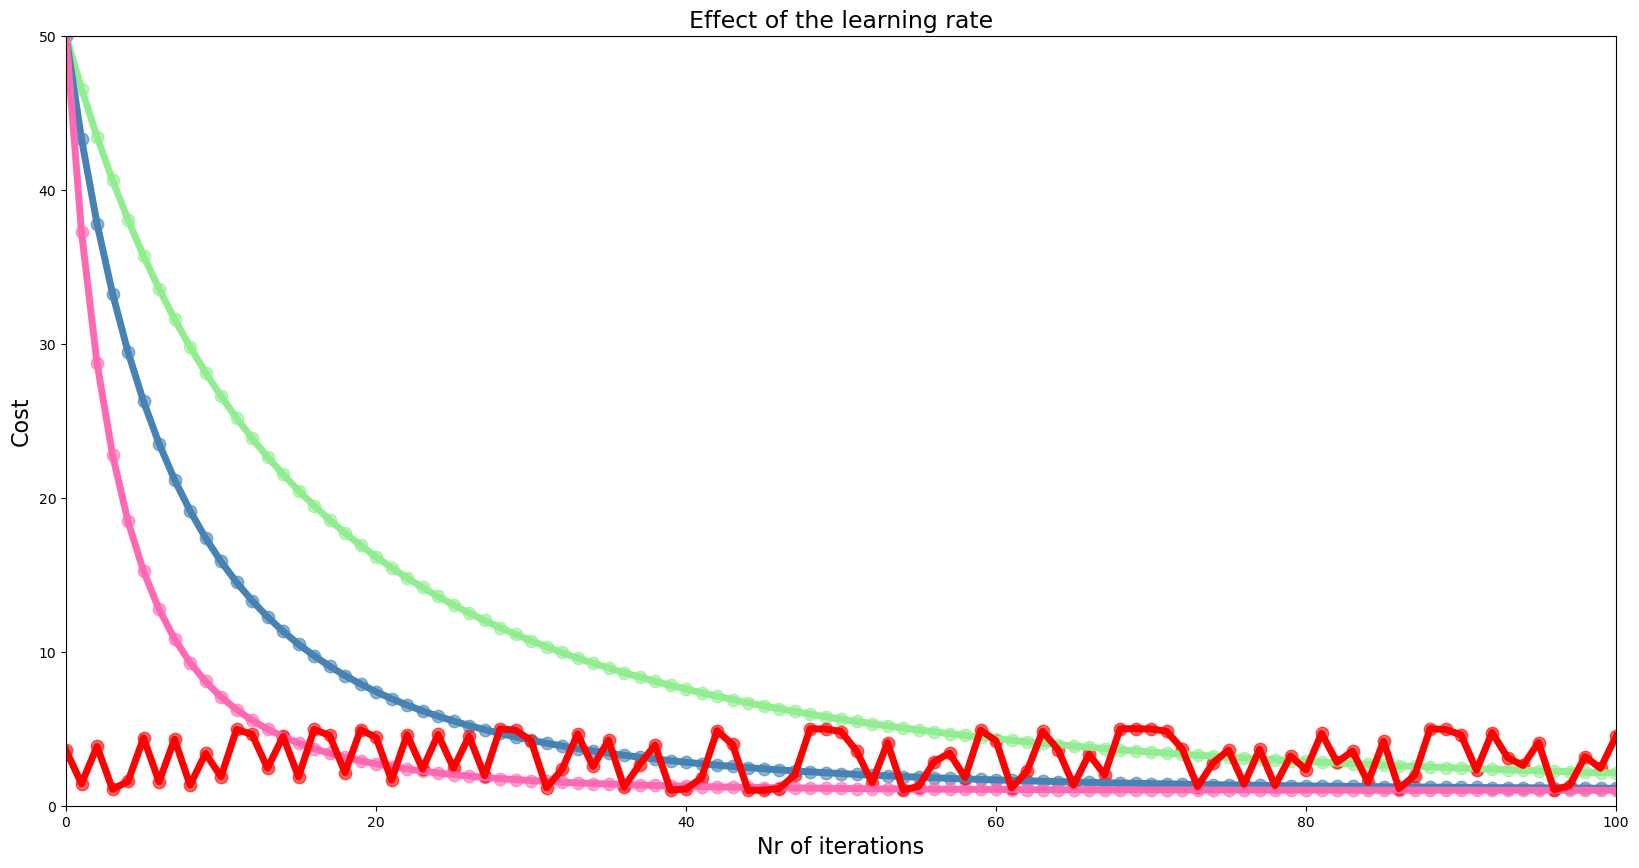

In [79]:
n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.0005, precision=0.0001, max_iter=n)    

# Challenge : Plot two more learning rates: mid_gamma (0.001 and high_gama(0.002))
mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.001, precision=0.0001, max_iter=n)
high_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.002, precision=0.0001, max_iter=n)

# Experiment
insane_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.25, precision=0.0001, max_iter=n)


# Plotting reduction in cost for each iteration

values = np.array(x_list)
plt.figure(figsize=[20,10])

# First chart : Cost function
plt.xlim(0, n)
plt.ylim(0, 50)

plt.title('Effect of the learning rate', fontsize=17)
plt.xlabel('Nr of iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)

# Values for our charts
# 1) Y Axis Data : Convert the lists to numpy arrays
low_values = np.array(low_gamma[1])

# 2) X Axis Data : Create a list from 0 to n+1
iteration_list = list(range(0,n+1))

# Plotting low learning rate
plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=5)
plt.scatter(iteration_list, g(low_values), color='lightgreen', s=80, alpha=.6)

# Plotting medium learning rate
plt.plot(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', linewidth=5)
plt.scatter(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', s=80, alpha=.6)

# Plotting high learning rate
plt.plot(iteration_list, g(np.array(high_gamma[1])), color='hotpink', linewidth=5)
plt.scatter(iteration_list, g(np.array(high_gamma[1])), color='hotpink', s=80, alpha=.6)

# Plotting insane learning rate
plt.plot(iteration_list, g(np.array(insane_gamma[1])), color='red', linewidth=5)
plt.scatter(iteration_list, g(np.array(insane_gamma[1])), color='red', s=80, alpha=.6)

plt.show()

   # Example 4 - Data Viz with 3D Charts
   ## Minimize $$f(x,y) = \frac{1}{3^{-x^2 -y^2}+1}$$
   
   Minimise $$f(x,y) \frac{1}{r + 1} $$ where $r$ is $r$ is $3^{-x^2 - y^2}$

In [106]:
def f(x, y):
    r = 3 ** (-x**2 - y**2)
    return 1 / (r + 1)

In [91]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)
print('Shape of y array', y_4.shape)

# Transformation of the array to 200,200 array (2D Array)
x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid', x_4.shape)
print(x_4)

Shape of X array (200,)
Shape of y array (200,)
Array after meshgrid (200, 200)
[[-2.         -1.9798995  -1.95979899 ...  1.95979899  1.9798995
   2.        ]
 [-2.         -1.9798995  -1.95979899 ...  1.95979899  1.9798995
   2.        ]
 [-2.         -1.9798995  -1.95979899 ...  1.95979899  1.9798995
   2.        ]
 ...
 [-2.         -1.9798995  -1.95979899 ...  1.95979899  1.9798995
   2.        ]
 [-2.         -1.9798995  -1.95979899 ...  1.95979899  1.9798995
   2.        ]
 [-2.         -1.9798995  -1.95979899 ...  1.95979899  1.9798995
   2.        ]]


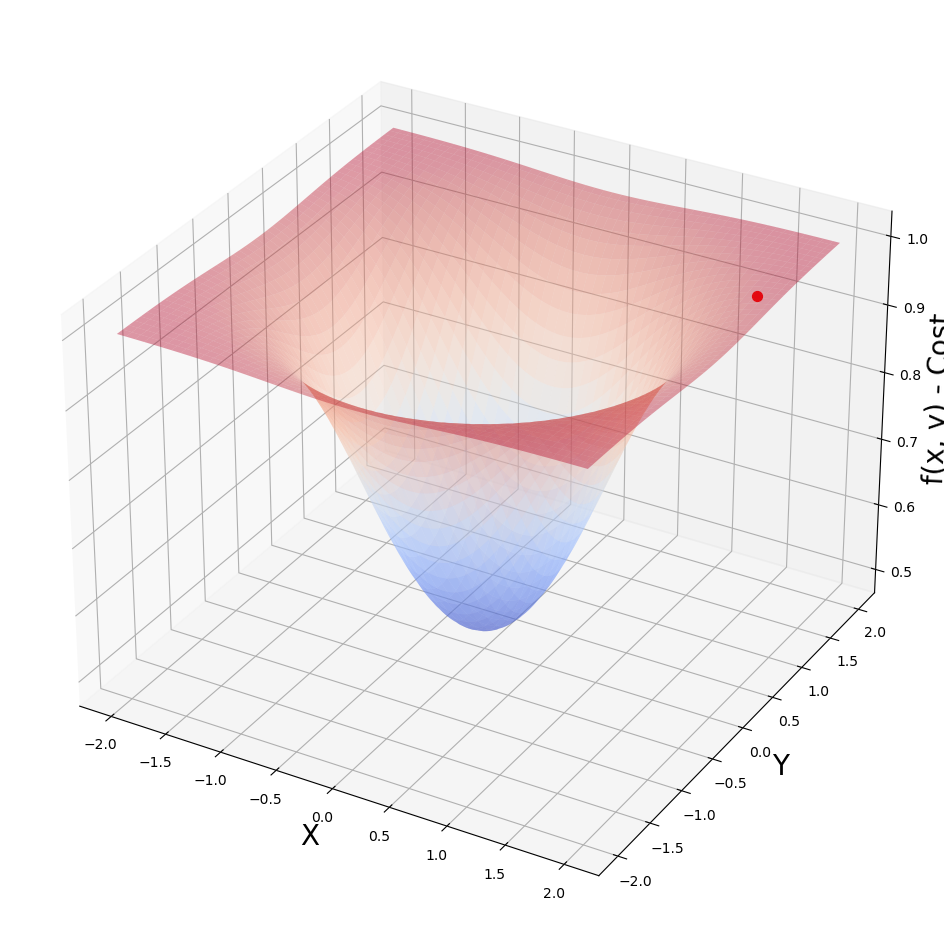

In [151]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)

plt.show()

## Partial Derivatives & Symbolic Computation

## $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 - y^2}}{\left(3^{-x^2 - y^2} + 1\right)^2} $$

## $$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 - y^2}}{\left(3^{-x^2 - y^2} + 1\right)^2} $$

In [94]:
a, b = symbols('x, y')
print('Our cost function f(x, y) is :', f(a,b))
print('Partial derivative wrt x is :', diff(f(a,b), a))
print('Value of f(x, y) at x=1.8 y=1.0 is ', f(a,b).evalf(subs={a:1.8, b:1})) # Python dictionnary
print('Value of partial derivative wrt x is ', diff(f(a,b), a).evalf(subs={a:1.8, b:1})) # Value of the slope

Our cost function f(x, y) is : 1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is : 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x, y) at x=1.8 y=1.0 is  0.990604794032582
Value of partial derivative wrt x is  0.0368089716197505


## Batch Gradient Descent with SymPy

In [127]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # Initial guess

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients # Param = param - multiplicateur * derivee partielle

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of:  3.45838599885832e-11
Minimum occurs at y value of:  1.92132555492129e-11
The cost is:  0.500000000000000


In [128]:
# Partial derivative functions example 4

def fpx(x, y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r + 1)**2

def fpy(x, y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r + 1)**2

In [129]:
fpx(1.8, 1.0)

0.036808971619750504

In [150]:
# Setup
multiplier = 0.1
max_iter = 500Z
params = np.array([1.8, 1.0]) # Initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients # Param = param - multiplicateur * derivee partielle

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

SyntaxError: invalid decimal literal (541501721.py, line 3)

# Graphing 3D Gradient Descent & Adv Numpy Arrays

In [156]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # Initial guess
values_array = params.reshape(1, 2) # 1 Row 2 colums

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients # Param = param - multiplicateur * derivee partielle
    #values_array = np.append(values_array, params.reshape(1,2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1,2)), axis=0) # Same thing as above
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


In [154]:
# Advanced Numpy Array Practice:

kirk = np.array([['Captain', 'Guitar']])
print(kirk.shape)

hs_band = np.array([['Black Thought', 'MC'], ['Questlove', 'Drums']])
print(hs_band.shape)

print('hs_band[0] : ', hs_band[0])
print('hs_band[0][1] : ', hs_band[0][1])
print('hs_band[1][0] : ', hs_band[1][0])

# Ajout en tant que colonne avec axis=1, besoin de reshaper le tableau
# the_roots = np.append(arr=hs_band, values=kirk.reshape(2,1), axis=1)
the_roots = np.append(arr=hs_band, values=kirk, axis=0)
print(the_roots)

# Select a column of the array
print('Printing nicknames... ', the_roots[:, 0]) # Take all the values in the row in the first column

the_roots = np.append(arr=the_roots, values=[['Malik B', 'MC']], axis=0)

print(the_roots) # The Roots "The next movement"

(1, 2)
(2, 2)
hs_band[0] :  ['Black Thought' 'MC']
hs_band[0][1] :  MC
hs_band[1][0] :  Questlove
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']]
Printing nicknames...  ['Black Thought' 'Questlove' 'Captain']
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']
 ['Malik B' 'MC']]


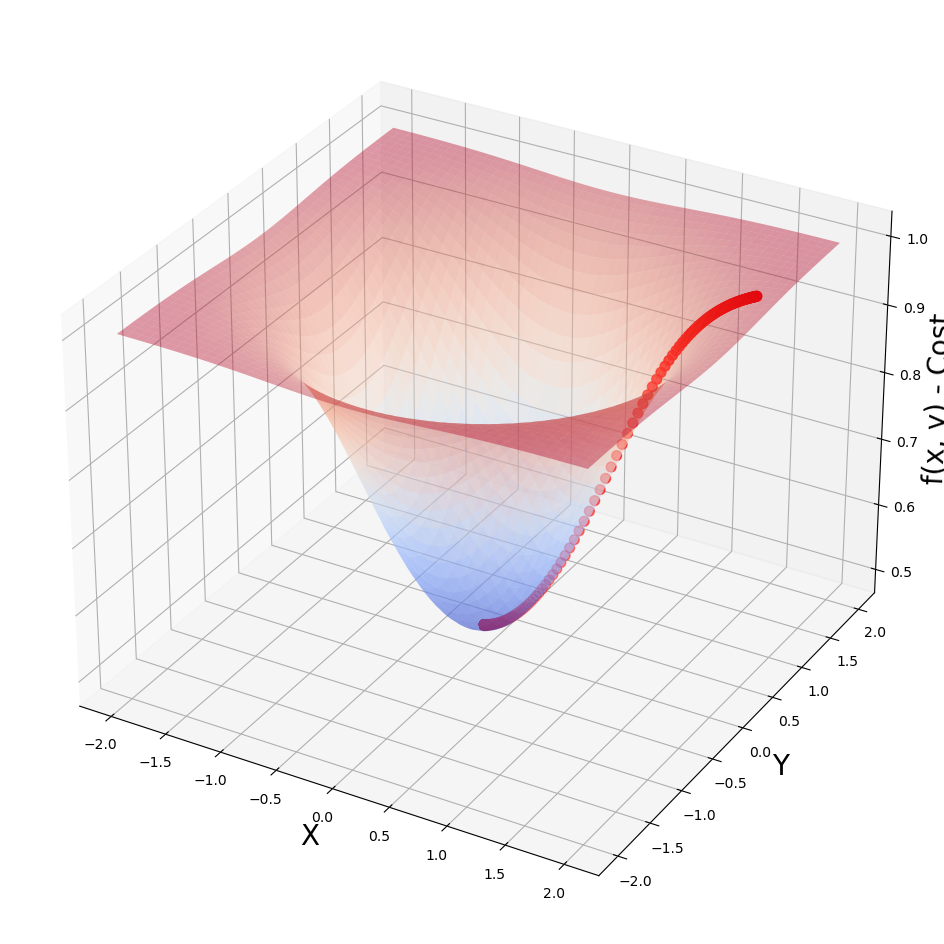

In [157]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:, 1], 
           f(values_array[:, 0], values_array[:, 1]), s=50, color='red')

plt.show()

# Example 5 - Working with data & Real Cost Function
## Mean Squared Error: a cost function for regression problems
### $$RSS = \sum_{i=1}^{n} \big(y^{(i)} - h \theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big(y^{(i)} - h \theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big(y - \hat{y} \big)^2 $$

In [23]:
# Make sample data
# x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
# y_5 = np.array([[1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]]).transpose()

x_5 = np.array([0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]).reshape(7, 1)
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_5 array : ', x_5.shape)
print('Shape of y_5 array : ', y_5.shape)

Shape of x_5 array :  (7, 1)
Shape of y_5 array :  (7, 1)


In [24]:
# Quick Linear Regression
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0: ', regr.intercept_[0])
print('Theta 1: ', regr.coef_[0][0])

Theta 0:  0.8475351486029536
Theta 1:  1.2227264637835915


Text(0, 0.5, 'y values')

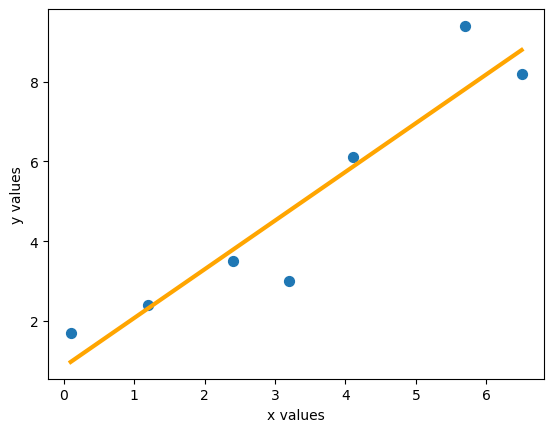

In [25]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')

In [26]:
# y_hat = theta0 + theta1*x
y_hat = regr.intercept_[0] + regr.coef_[0][0] * x_5
print('Est values y_hat are : \n', y_hat)
print('In comparison, the actual y values are \n', y_5)

Est values y_hat are : 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [27]:
# Challenge : Write a python function mse(y, y_hat) returns the MSE? Call the mse()
#def mse(y, y_hat):
#    mse = 0
#    for i in range(y):
#        mse += 1/(y[i] + y_hat[i])
#    return mse

def mse(y, y_hat):
    # mse_calc = 1/y.size * sum((y - y_hat)**2)
    mse_calc = np.average((y - y_hat)**2, axis=0)
    return mse_calc

In [28]:
print('Manually calculated MSE is :', mse(y_5, y_hat))
print('MSE regression using manual calc is', mean_squared_error(y_5, regr.predict(x_5)))

Manually calculated MSE is : [0.94796558]
MSE regression using manual calc is 0.9479655759794577


In [42]:
# 3D Plot for the MSE Cost Function
## Make data from thetas
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)
plot_t0

array([[-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       ...,
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ]])

In [43]:
### Calc MSE using nested for loops


In [44]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[j][i])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)
        
print('Shape of plot t_0', plot_t0.shape)
print('Shape of plot t_1', plot_t1.shape)
print('Shape of plot t_cost', plot_cost.shape)

Shape of plot t_0 (200, 200)
Shape of plot t_1 (200, 200)
Shape of plot t_cost (200, 200)


In [45]:
# Nested loop practice
for i in range(3):
    for j in range(3):
        print(f'Value of i is {i} and j is {j}')

Value of i is 0 and j is 0
Value of i is 0 and j is 1
Value of i is 0 and j is 2
Value of i is 1 and j is 0
Value of i is 1 and j is 1
Value of i is 1 and j is 2
Value of i is 2 and j is 0
Value of i is 2 and j is 1
Value of i is 2 and j is 2


In [ ]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [55]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)
print('Min occurs at (i,j)', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]', plot_t0[111][91])
print('Min MSE for Theta 1 at plot_t0[111][91]', plot_t1[111][91])

Min value of plot_cost 0.9483826526747164
Min occurs at (i,j) (111, 91)
Min MSE for Theta 0 at plot_t0[111][91] 0.829145728643216
Min MSE for Theta 1 at plot_t0[111][91] 1.2311557788944723


# Partial Derivatives of MSE w.r.t $\theta_0$ and $\theta_1$

## $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) $$